In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = (20,4)
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
#to omit some annoying warning messages due to importing statsmodels.tsa.stattools
np.warnings.filterwarnings("ignore")
from pandas.core import datetools
np.warnings.resetwarnings()

C:\Users\sache\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
pd.options.display.float_format = '{:20,.2f}'.format

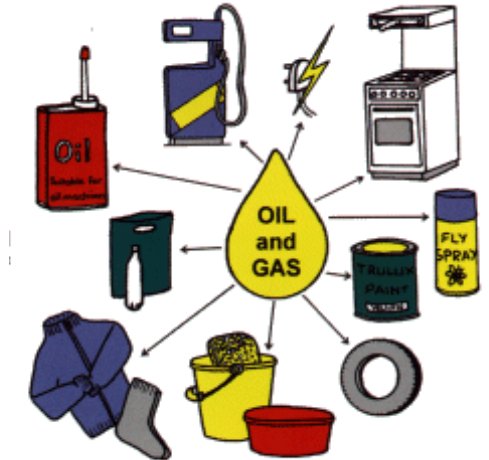

In [3]:
Image("./data/oil products.png", width=300, height=300)

## Oil prices: why we care

- Oil is the bloodline of economy: in addition to feuling the cars, many of daily products are made from oil 
- Even though we are getting more diverse energy sources, we still rely on oil heavily, and as raw material for many products.
- Some countries' entire economy depend on oil, such as the OPEC countries, and Venezuela. 


[What Are Some Common Products Made From Petroleum](https://www.reference.com/science/common-products-made-petroleum-aa3bfdba11daca7d)

> Petroleum, or crude oil, is a fossil fuel that is frequently associated with the production of gasoline, kerosene, and diesel oil, but it has many uses.

>Some household products, such as detergent and candles, are made from petroleum. Synthetic fibers, CDs and DVDs are other products made from petroleum.

>All plastics, such as those used in the manufacturing of DVDs, are made from petrochemicals, which is composed mainly of oil. 

>Many medicines, such as vitamins, are made from chemicals that are created from petroleum. 

>Some other common products that utilize petroleum are tires, ink, cosmetics, chewing gum, nylons, paint and asphalt, to name a few.



## Oil prices： WTI vs. Brent 

West Texas Intermediate (WTI) and Brent crude oil are two major benchmarks for world oil prices: 

- WTI is generally lighter and sweeter than Brent. Light and sweet forms of crude oil are generally valued higher because it is easier to process. 
- WTI is refined mostly in the Midwest and Gulf Coast regions of the United States. 


- Brent is heavy and sour therefore are cheaper.  
- Brent is typically refined in Northwest Europe.

## Interesting stories on oil
- [How do we get oil and gas out of the ground?](http://www.world-petroleum.org/edu/222-how-do-we-get-oil-and-gas-out-of-the-ground)

##### We use WTI for this analysis

In [4]:
df = pd.read_csv(r'C:\Users\sache\Documents\BarPlot\data\wti-daily.csv')

In [5]:
df.head(2)

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.index=df.Date
df=df.drop('Date', axis=1)

Text(0,0.5,'price $')

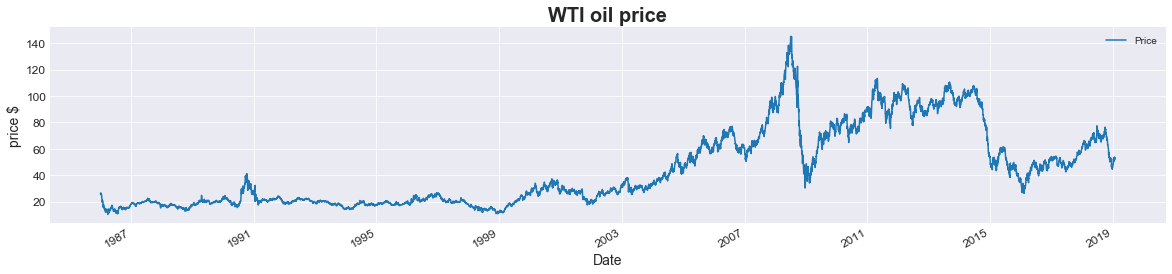

In [7]:
plt.rcParams["figure.figsize"] = (20,4)
df.plot()
plt.title("WTI oil price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("price $")

## oil price statistics (1 barrel = 42 gallons)

- median is \$30 per barrel
- lowest \$10 per barrel

## Oil price rose to extreme during the last Financial Crisis
- high oil price for oil companies in general is good news as they get more money
        - Highest \$145 per barrel on **July 3, 2008**
        
        - But not this high!  Something bad was cooking
        
        - Sure thing: about 5 months later oil dropped to about $35

- Notice that (145.31 - 43.79)/29.52 = 3.43!   
    - This $145 price is more than 3 standard deviation away from the mean
- [Lehman Brothers filed bankruptcy](https://en.wikipedia.org/wiki/Bankruptcy_of_Lehman_Brothers) on **September 15, 2008**, which was the largest bankruptcy filing of all time
- Bear Stearns was sold to JPM in March, 2008

- the Financial Crisis brought a big chunck of the global economy to a stop 
        - demand for oil stopped 
        
        - oil price free fall
        
- Looking at the data, notice these facts:

    -Even though oil price went to extremes, they **did not go to extremes overnight**
        -the maximum daily rise was $18.56 on September 22, 2018
        
        -the largest daily drop was $14.76 on September 23, 2018
        
        -price was highly volatile in September, 2008 (when Lehman filed bankruptcy) 

In [8]:
df.describe(include='all').round(2).T

,count,mean,std,min,25%,50%,75%,max
Price,"8,337.00",43.79,29.52,10.25,19.62,30.08,64.21,145.31


In [9]:
df.idxmax(axis=0, skipna=True)

Price   2008-07-03
dtype: datetime64[ns]

In [10]:
df.idxmin(axis=0, skipna=True)

Price   1986-03-31
dtype: datetime64[ns]

In [11]:
df.diff(1).loc[pd.to_datetime(df.diff(1).idxmax())]

,Price
Date,
2008-09-22,18.56


In [12]:
df.diff(1).loc[pd.to_datetime(df.diff(1).idxmin())]

,Price
Date,
2008-09-23,-14.76


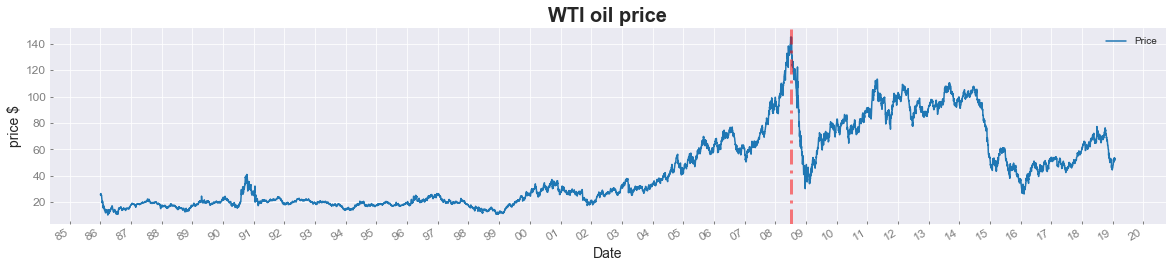

In [13]:
price_max= pd.to_datetime("2008-07-03")
ax = df.plot()
plt.title("WTI oil price", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.axvline(price_max, color ='red', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=3.0)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

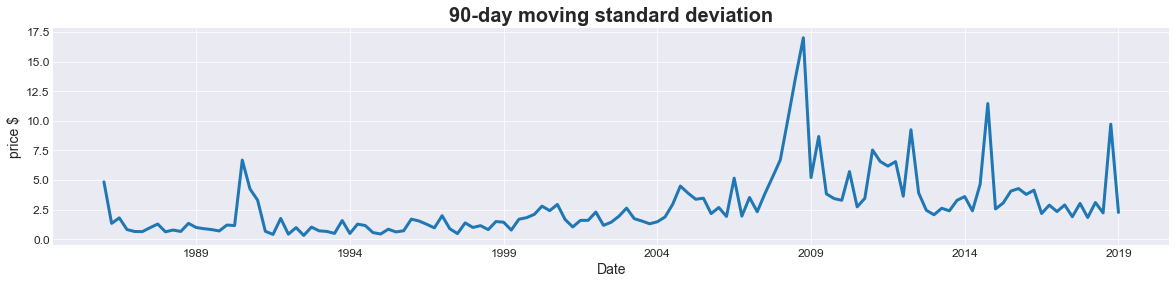

In [14]:
df.Price.resample('Q').std().plot(linewidth=3)
plt.title("90-day moving standard deviation", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.axvline(price_max, color ='red', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=3.0)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')



## Distribution of WTI since 1986
- Oil price min was at the beginning 
- We need longer hertorical data to get a better understanding (later)

Text(0,0.5,'count')

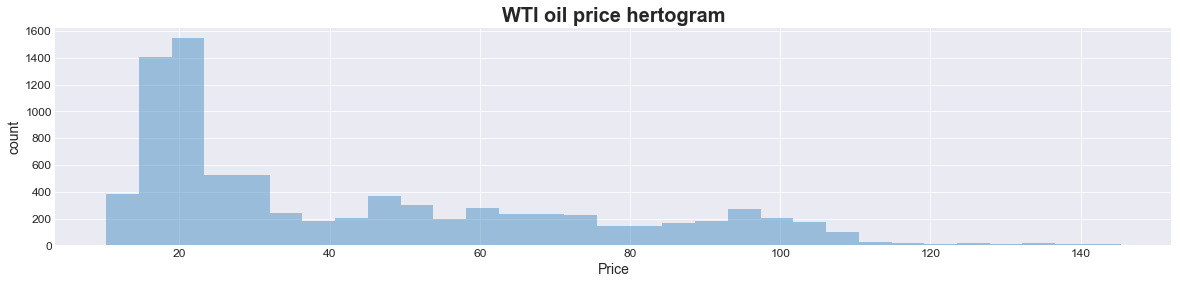

In [15]:
sns.distplot(df.Price, kde=False)
plt.title("WTI oil price hertogram", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("count")

## Quarterly mean
The original data was daily price.  Sometimes we want to know what the average price of each quarter is.  
- Because many macroeconomic data are released on quarterly frequencies, if we want to check oil prices against those data, we would want to look at oil price quarterly.  One way is to look at the average.


- observe that line becomes smoother

In [16]:
quarter_mean=df.resample('q').mean()
quarter_mean.columns=['qtr_mean']
quarter_mean.head().T

Date,1986-03-31 00:00:00,1986-06-30 00:00:00,1986-09-30 00:00:00,1986-12-31 00:00:00,1987-03-31 00:00:00
qtr_mean,17.22,13.87,13.81,15.41,18.25


- even though the highest daily price happended on 2008-07-03, the highest quarterly average price was the second quarter of 2008.  We can see that it was well above $120 per barrel.

In [17]:
quarter_mean.idxmax()

qtr_mean   2008-06-30
dtype: datetime64[ns]

In [18]:
quarter_mean.iloc[10:20:2,:]

,qtr_mean
Date,
1988-09-30,15.18
1989-03-31,18.51
1989-09-30,19.29
1990-03-31,21.78
1990-09-30,26.22


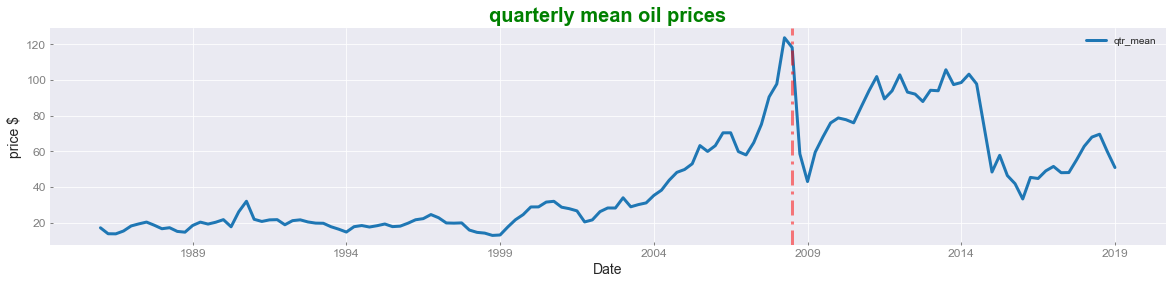

In [19]:
ax = quarter_mean.plot(linewidth=3)
plt.title("quarterly mean oil prices", color='g', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax.axvline(price_max, color ='red', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=3.0)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

## quarter over quarter difference in oil price


- What is the average price of this quarter comparing with the average price of last quarter?
- Data shows that the largest drop was in 4Q2008, where the average quarterly price dropped by $60
    
    - Notice this is a much larger drop than the daily drop because daily drops can **add up**
    
        - For example, if price was \$10 lower than the previous day for 3 days in a row, it would be $30 lower on the 4th day


In [20]:
quarter_mean.diff(1).loc[pd.to_datetime(quarter_mean.diff(1).idxmin())]

,qtr_mean
Date,
2008-12-31,-59.61


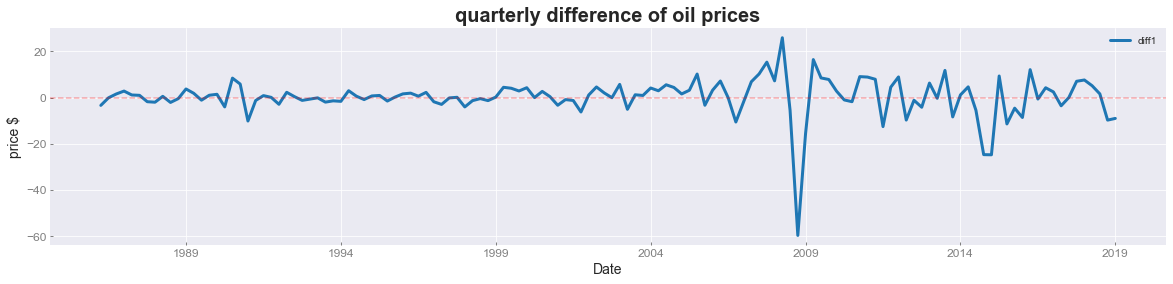

In [21]:
ax=quarter_mean.diff(1).dropna().plot(figsize=(20,4),linewidth=3)
plt.title("quarterly difference of oil prices", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("difference in $")
plt.legend().get_texts()[0].set_text('diff1')
ax.axhline(y=0,color='r', linestyle='--', alpha=0.3)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

## quarter over quarter change in oil price

Change is relative to the last quarter.  Quarterly price difference divided by last quarter's price

In [22]:
#alternatively we could use .pct_change function
QoQ = (quarter_mean.diff(1)/quarter_mean.shift(1)).dropna(how='any')
QoQ['q']=QoQ.index.quarter
QoQ.columns=['QoQ_growth','q']
#qtr_mean = df.Price.resample('Q').mean().to_frame()
#qtr_mean.columns=['qtr_mean']
#qtr_mean.head()
#qtr_chg = qtr_mean.pct_change(axis='rows')

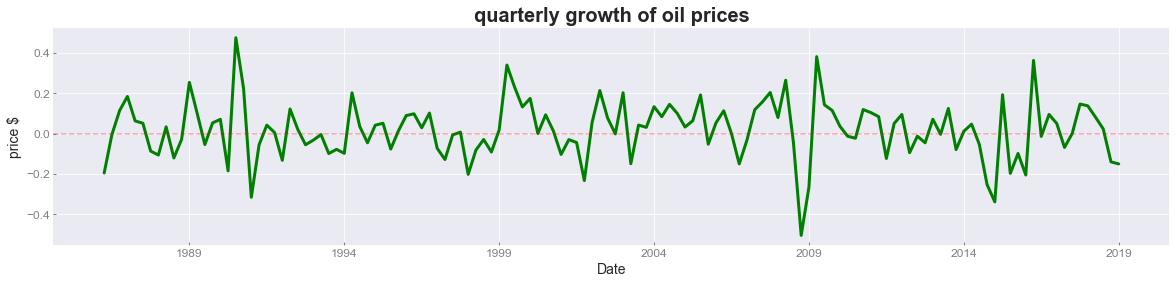

In [23]:
ax = QoQ.QoQ_growth.plot(figsize=(20,4),linewidth=3, c='g')
plt.title("quarterly growth of oil prices", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("growth in %")
ax.axhline(y=0,color='r', linestyle='--', alpha=0.3)
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

Before we get into more numbers and statistics, let's pause and read some old media report:
[Oil settles at record high above $140 from CNN Money](https://money.cnn.com/2008/06/27/markets/oil/)

>Crude prices jump as the Dow enters bear territory, but drift from daily highs towards end of session in anticipation that trading next week will be light.
>NEW YORK (CNNMoney.com) -- Oil prices settled above \$140 a barrel for the first time Friday during a thinly traded session on Friday as a selloff on Wall Street sent the Dow into bear market territory. 

>Also enflaming crude prices: expectations that the dollar will remain weak and continuing concerns about global supply disruptions.
Light, sweet crude rose 57 cents to settle at \$140.21 a barrel on the New York Mercantile Exchange. 

>The August contract reached an all-time high of $142.99 in the afternoon, but sold off towards the end of the day as traders anticipated light volume next week. 
"With people out of the markets for July 4th, traders sold off towards the end of the session to play the market safe for next week," said Peter Beutel, an oil analyst with Cameron Hanover.

>The oil market's early rally came as the stock market stumbled with the Dow dropping more than 150 points before recovering slightly Friday afternoon.

>"The lack of confidence in financial markets is pushing investors back into the hard-asset class," said John Kilduff, an energy analyst at MF Global in New York.

>Stocks have been battered in recent sessions partly because of rising oil prices but also due to fresh signs of weakness in the broader economy. 

>Many investors view oil and other commodities as a safe haven in times of financial turmoil. 
Currency issues: Many analysts say the dollar's decline has been a major driver of oil prices, which have more than doubled in the last year. 

## Seasonality

In [24]:
df['month']=df.index.month

In [25]:
df.loc[df.index.year !=2008].index.year.unique()

Int64Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Date')

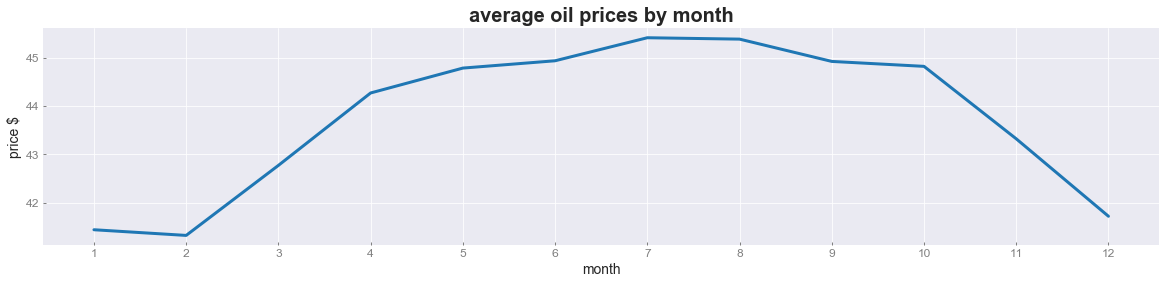

In [26]:
tick_spacing = 1
ax =df.groupby(['month'])['Price'].mean().plot(linewidth=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title("average oil prices by month", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

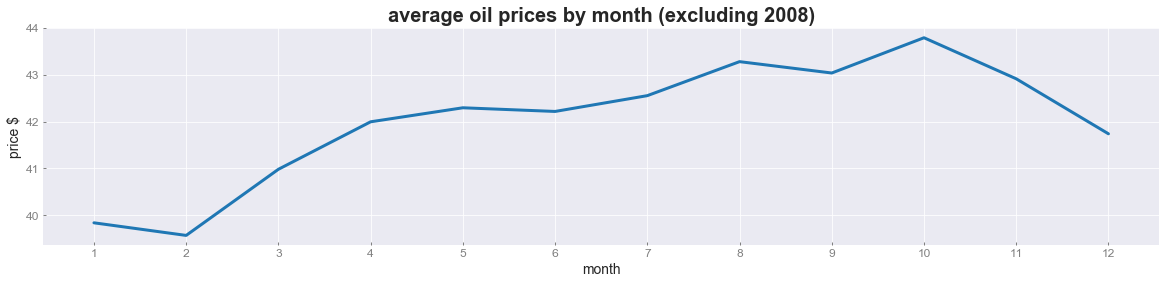

In [27]:
ax =df.loc[df.index.year !=2008].groupby(['month'])['Price'].mean().plot(linewidth=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title("average oil prices by month (excluding 2008)", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel("price $")
ax.tick_params(direction='in', length=3, width=1, colors='grey')

## How bad is the seasonality?

C:\Users\sache\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\sache\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


Text(0.5,1,'boxplot of prices by month')

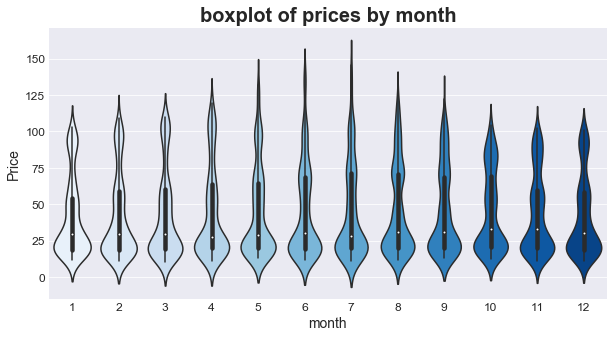

In [28]:
#palette =sns.light_palette((210, 90, 60), input="husl")
plt.rcParams["figure.figsize"] = (10,5)
sns.violinplot( x='month', y='Price', data=df, showmeans=True,saturation=1.00, boxprops=dict(alpha=.5),  palette ='Blues')
plt.title("boxplot of prices by month", fontdict={'fontsize': 20, 'fontweight': 'bold'})



C:\Users\sache\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'boxplot of prices by month')

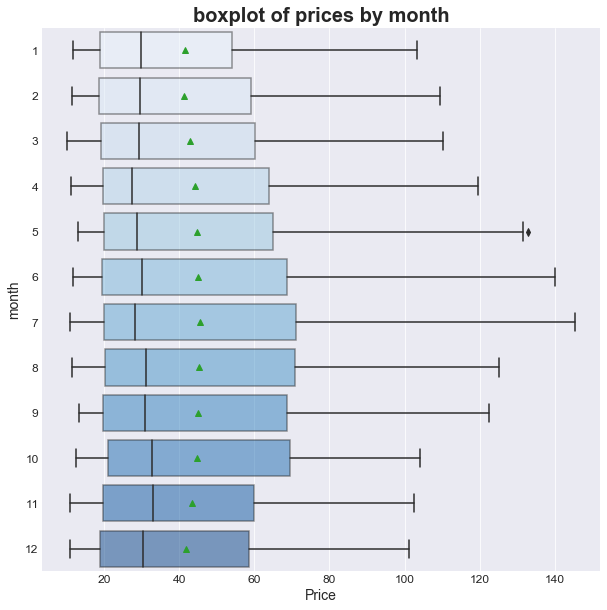

In [29]:
plt.rcParams["figure.figsize"] = (10,10)
sns.boxplot( y='month', x='Price', data=df, showmeans=True,saturation=1.00, boxprops=dict(alpha=.5),orient='h',  palette ='Blues')
plt.title("boxplot of prices by month", fontdict={'fontsize': 20, 'fontweight': 'bold'})
#plt.rcParams["figure.figsize"] = (20,4)


C:\Users\sache\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'boxplot of prices by quarter')

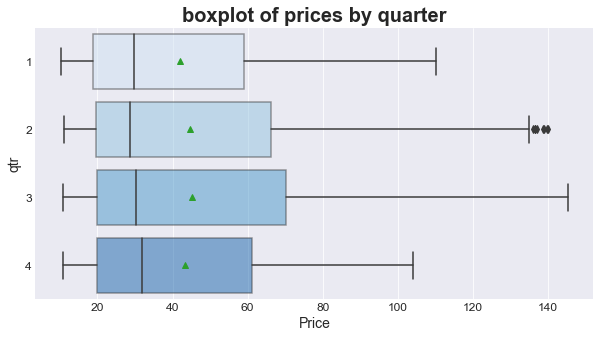

In [30]:
plt.rcParams["figure.figsize"] = (10,5)
df['qtr']=df.index.quarter
sns.boxplot( x='Price', y='qtr', data=df, showmeans=True,saturation=1.00, orient='h',boxprops=dict(alpha=.5),  palette ='Blues')
plt.title("boxplot of prices by quarter", fontdict={'fontsize': 20, 'fontweight': 'bold'})


It looks that the first quarter has the lowest average oil price, likely due to in the winter month there is less driving?

## Stationary test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. 

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). 

The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [31]:
def test_stationarity(timeseries):   
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput )

In [32]:
quarter_mean.head()

,qtr_mean
Date,
1986-03-31,17.22
1986-06-30,13.87
1986-09-30,13.81
1986-12-31,15.41
1987-03-31,18.25


In [33]:
test_stationarity(quarter_mean.qtr_mean)

Results of Dickey-Fuller Test:
Test Statistic                               -1.69
p-value                                       0.44
#Lags Used                                    2.00
Number of Observations Used                 130.00
Critical Value (1%)                          -3.48
Critical Value (5%)                          -2.88
Critical Value (10%)                         -2.58
dtype: float64


Running the example prints the test statistic value of -1.69. 

The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. 

We can see that our statistic value of -1.69 is larger than the value of -2.578770 at 10%, and the p-value is over 0.43.   

This suggests that we cannot reject the null hypothesis.  

=> Quarterly oil prices are not stationary.

In [34]:
qtr_chg = pd.DataFrame(quarter_mean.qtr_mean.pct_change(axis='rows'))
qtr_chg.dropna(how='any', inplace=True)
test_stationarity(qtr_chg['qtr_mean'])

Results of Dickey-Fuller Test:
Test Statistic                               -6.70
p-value                                       0.00
#Lags Used                                    4.00
Number of Observations Used                 127.00
Critical Value (1%)                          -3.48
Critical Value (5%)                          -2.88
Critical Value (10%)                         -2.58
dtype: float64


Reject null hypothesis. 

This means that quarterly oil price change is stationary.

However, a drawback in this particular approach is that the time-period has to be strictly defined. 

In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. 

So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. 

A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor. Find details here. This can be implemented in Pandas as: